# 분석 주제

- 이번에는 후스스코어 에서 받아온 공격,수비,패스,기록을 바탕으로 손흥민선수가 커리어 하이를 기록하게 된 2020/2021 시즌을 집중적으로 분석해보려한다.

## 1. 스크래핑한 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
def dataget(url): # 데이터 얻어오기
    df=pd.read_csv(url)
    return df

In [3]:
def indexdrop(data): # 중복 인덱스 삭제
    data.drop(['Unnamed: 0'],axis=1,inplace=True)
    return data

In [4]:
def Mins(data): # 너무 적게 뛴 선수들 제외.
    filt=data['Mins']>2196
    return data[filt]

In [5]:
def Gk_Out(data):
    filt=data['position1']==' GK'
    return data.drop(index=data[filt].index)

In [6]:
# 수비 기록
data_D=dataget('EPL_2020-2021_Player_Defensive_data.csv')
data_D=indexdrop(data_D)
# 공격 기록
data_O=dataget('EPL_2020-2021_Player_Offensive_data.csv')
data_O=indexdrop(data_O)
# 패싱 기록
data_P=dataget('EPL_2020-2021_Player_Passing_data.csv')
data_P=indexdrop(data_P)

In [7]:
data_D

,name,age,position1,position2,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating
0,Harry Kane Tottenham,28,AM(C),AM(C),35,3087,0.6,0.3,0.7,0.0,1.1,0.5,0.3,0,7.79
1,Kevin De Bruyne Man City,30,M(CLR),M(CLR),23(2),2001,1.4,0.4,1.1,0.0,0.3,1.4,0.0,0,7.65
2,Jack Grealish Aston Villa,26,AM(CL),NaN,24(2),2184,1.2,0.5,1.5,0.0,0.2,0.3,0.1,0,7.56
3,Bruno Fernandes Man Utd,27,M(CLR),NaN,35(2),3110,1.5,0.7,1.2,0.0,0.7,2.0,0.0,0,7.43
4,Tomas Soucek West Ham,26,DMC,NaN,38,3420,2.1,1.6,1.8,0.1,2.7,1.3,0.5,1,7.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,Mark Noble West Ham,34,M(C),NaN,8(13),707,0.4,0.6,0.4,0.0,0.1,0.5,0.1,0,6.17
287,Rhian Brewster Sheff Utd,21,FW,NaN,12(15),1125,0.3,0.2,0.7,0.0,0.1,0.4,0.1,0,6.17
288,Karlan Grant West Brom,24,AM(CL),AM(CL),14(7),1133,0.2,0.2,0.4,0.0,0.7,0.1,0.0,0,6.15
289,Hal Robson-Kanu West Brom,32,AM(LR),AM(LR),2(17),549,0.1,0.1,0.8,0.0,0.4,0.1,0.0,0,6.13


### 수비기록에서는 태클,인터셉트,클리어,블락을 분석.

In [8]:
data_O

,name,age,position1,position2,Apps,Mins,Goals,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,Rating
0,Harry Kane Tottenham,28,AM(C),AM(C),35,3087,23,14,3.9,1.4,1.5,1.7,0.4,1.5,1.8,7.79
1,Kevin De Bruyne Man City,30,M(CLR),M(CLR),23(2),2001,6,12,3.2,3.2,1.9,1.2,0.0,1.3,1.8,7.65
2,Jack Grealish Aston Villa,26,AM(CL),NaN,24(2),2184,6,10,1.9,3.1,2.5,4.2,0.3,1.5,2.1,7.56
3,Bruno Fernandes Man Utd,27,M(CLR),NaN,35(2),3110,18,12,3.3,2.6,0.6,1.4,0.1,1.0,1.5,7.43
4,Tomas Soucek West Ham,26,DMC,NaN,38,3420,10,1,1.7,0.5,0.4,1.1,0.1,0.6,1.1,7.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,Mark Noble West Ham,34,M(C),NaN,8(13),707,0,0,0.0,0.2,0.1,0.4,0.0,0.3,0.2,6.17
287,Rhian Brewster Sheff Utd,21,FW,NaN,12(15),1125,0,0,0.9,0.4,0.3,0.5,0.1,0.7,0.7,6.17
288,Karlan Grant West Brom,24,AM(CL),AM(CL),14(7),1133,1,0,0.8,0.1,0.4,0.6,0.3,0.8,1.5,6.15
289,Hal Robson-Kanu West Brom,32,AM(LR),AM(LR),2(17),549,2,0,0.7,0.3,0.3,0.5,0.2,0.8,1.6,6.13


### 공격 기록에서는 골,평균슈팅수,드리블,터치실수를 분석

In [9]:
data_P.head(20)

,name,age,position1,position2,Apps,Mins,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating
0,Harry Kane Tottenham,28,AM(C),AM(C),35,3087,14,1.4,25.9,69.9,0.2,1.9,0.1,7.79
1,Kevin De Bruyne Man City,30,M(CLR),M(CLR),23(2),2001,12,3.2,50.6,81.7,1.6,2.6,0.2,7.65
2,Jack Grealish Aston Villa,26,AM(CL),NaN,24(2),2184,10,3.1,38.3,83.3,0.7,1.2,0.1,7.56
3,Bruno Fernandes Man Utd,27,M(CLR),NaN,35(2),3110,12,2.6,57.1,78.3,1.1,3.8,0.2,7.43
4,Tomas Soucek West Ham,26,DMC,NaN,38,3420,1,0.5,42.3,75.5,0.0,2.2,0.0,7.36
5,Mason Mount Chelsea,22,M(CLR),NaN,32(4),2892,5,2.4,47.3,86.5,1.7,1.6,0.0,7.33
6,Sadio Mané Liverpool,29,AM(CLR),AM(CLR),31(4),2813,7,1.7,28.8,78.7,0.3,0.8,0.0,7.33
7,Riyad Mahrez Man City,30,AM(CLR),NaN,23(4),1955,6,1.6,37.2,88.4,0.7,0.9,0.0,7.31
8,João Cancelo Man City,27,D(LR),D(LR),27(1),2302,3,1.6,66.2,87.1,0.4,2.4,0.1,7.31
9,Gareth Bale Tottenham,32,M(CLR),M(CLR),10(10),923,2,1.1,18.3,73.2,0.6,1.5,0.1,7.30


### 패스 기록에서는 어시스트, 키패스,평균 패스 횟수,패스 성공률 을 분석

In [10]:
data_O.describe()

,age,Mins,Goals,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,Rating
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,27.309278,2196.264605,3.030928,2.134021,0.942612,0.708935,0.750515,0.807216,0.129210,0.672165,1.141237,6.755189
std,3.655023,699.564028,4.049147,2.480109,0.731629,0.550413,0.634218,0.539715,0.191741,0.538147,0.767452,0.273650
min,19.000000,513.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.120000
25%,24.000000,1615.000000,0.000000,0.000000,0.400000,0.300000,0.300000,0.400000,0.000000,0.200000,0.600000,6.570000
50%,27.000000,2249.000000,1.000000,1.000000,0.700000,0.600000,0.600000,0.700000,0.100000,0.600000,1.000000,6.750000
75%,30.000000,2700.000000,4.000000,3.000000,1.300000,1.000000,1.100000,1.100000,0.200000,1.000000,1.600000,6.915000
max,37.000000,3420.000000,23.000000,14.000000,3.900000,3.200000,4.100000,4.200000,1.100000,2.700000,3.600000,7.790000


### 경기를 너무 적게 뛴 선수들을 제외 하고 평균 2196분 이상을 뛴 선수만 얻어오겠다.

In [11]:
data_O=Mins(data_O)
data_D=Mins(data_D)
data_P=Mins(data_P)

### GK(골키퍼)제외 필요

In [12]:
data_O=Gk_Out(data_O)
data_D=Gk_Out(data_D)
data_P=Gk_Out(data_P)

### 인덱스 재설정

In [13]:
data_O=data_O.reset_index()

In [14]:
data_D=data_D.reset_index()

In [15]:
data_P=data_P.reset_index()

In [16]:
data_O=data_O.drop(columns=['index'])
data_D=data_D.drop(columns=['index'])
data_P=data_P.drop(columns=['index'])

### 손흥민 선수의 데이터만 갖고오기

In [17]:
filt=data_O['name']=='Son Heung-Min Tottenham'
son_data_O=data_O[filt]
filt=data_D['name']=='Son Heung-Min Tottenham'
son_data_D=data_D[filt]
filt=data_P['name']=='Son Heung-Min Tottenham'
son_data_P=data_P[filt]

### 분석에 필요한 정보만 갖고오기

1. name, Mins
2. 공격: 골,평균슈팅수,드리블,터치실수
3. 수비: 태클,인터셉트,클리어,블락
4. 패스: 어시스트, 키패스,평균 패스 횟수,패스 성공률

In [18]:
son_data=son_data_O[['name','Mins','Goals','SpG','Drb','UnsTch']]

In [19]:
son_data['Tackles']=son_data_D['Tackles']
son_data['Inter']=son_data_D['Inter']
son_data['Clear']=son_data_D['Clear']
son_data['Blocks']=son_data_D['Blocks']
son_data['Assists']=son_data_P['Assists']
son_data['KeyP']=son_data_P['KeyP']
son_data['AvgP']=son_data_P['AvgP']
son_data['PS%']=son_data_P['PS%']

In [20]:
son_data

,name,Mins,Goals,SpG,Drb,UnsTch,Tackles,Inter,Clear,Blocks,Assists,KeyP,AvgP,PS%
6,Son Heung-Min Tottenham,3127,17,1.8,1.1,1.6,0.9,0.4,0.1,0.1,10,2.0,28.6,83.4


### 공격 수비 패스 전체 선수 기록 합치기 및 안쓰는 데이터 삭제

In [21]:
#1. 한 데이터만 제외하고 중복컬럼 삭제
#2 .공격 수비 합치기
data_D=data_D[['Tackles','Inter','Clear','Blocks']]
data_O=data_O.drop(columns=['Disp','Fouled','Off'])
data_P=data_P[['AvgP','PS%']]

In [22]:
total_data=pd.concat([data_O,data_D],axis=1)

In [23]:
total_data=pd.concat([total_data,data_P],axis=1)

In [24]:
total_data

,name,age,position1,position2,Apps,Mins,Goals,Assists,SpG,KeyP,Drb,UnsTch,Rating,Tackles,Inter,Clear,Blocks,AvgP,PS%
0,Harry Kane Tottenham,28,AM(C),AM(C),35,3087,23,14,3.9,1.4,1.5,1.8,7.79,0.6,0.3,1.1,0.3,25.9,69.9
1,Bruno Fernandes Man Utd,27,M(CLR),NaN,35(2),3110,18,12,3.3,2.6,0.6,1.5,7.43,1.5,0.7,0.7,0.0,57.1,78.3
2,Tomas Soucek West Ham,26,DMC,NaN,38,3420,10,1,1.7,0.5,0.4,1.1,7.36,2.1,1.6,2.7,0.5,42.3,75.5
3,Mason Mount Chelsea,22,M(CLR),NaN,32(4),2892,6,5,2.3,2.4,1.2,1.6,7.33,2.1,0.9,0.3,0.1,47.3,86.5
4,Sadio Mané Liverpool,29,AM(CLR),AM(CLR),31(4),2813,11,7,2.7,1.7,2.3,2.9,7.33,1.4,0.4,0.3,0.0,28.8,78.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Oliver Norwood Sheff Utd,30,M(C),NaN,26(6),2226,0,0,0.3,1.0,0.1,0.5,6.48,1.5,1.1,1.5,0.4,43.9,83.4
125,Ryan Bertrand Southampton,32,D(CL),D(CL),29,2599,0,1,0.3,0.5,0.1,0.9,6.41,2.1,1.0,1.3,0.0,41.3,79.6
126,Semi Ajayi West Brom,28,D(C),D(C),31(2),2780,2,0,0.4,0.2,0.3,0.7,6.40,1.2,1.3,3.6,1.0,28.4,73.2
127,Enda Stevens Sheff Utd,31,D(CL),D(CL),30,2700,0,1,0.5,0.6,0.7,1.5,6.39,2.0,0.7,2.5,0.4,39.5,78.1


## 2. 그래프 그리기

In [25]:
def graph(types):
    plt.figure(facecolor='#20283C')
    ax =plt.gca()
    ax.set_facecolor('#20283C')
    plt.scatter(total_data[types],total_data['Mins'],s=200,alpha=0.7,c='#ECF0F1')
    plt.scatter(son_data[types],son_data['Mins'],s=400,c='r')
    plt.text(son_data[types],son_data['Mins']+400,float(son_data[types]),ha='center',c='r',size=20)
    plt.tick_params(axis='y',direction='in',labelsize=0)
    plt.tick_params(axis='x',direction='out',labelsize=15,pad=5,length=10,color='#7B7D7D',labelcolor='#7B7D7D')
    plt.yticks([0,6000])
    plt.xlabel(types,color='w',size=20)
    plt.savefig(str(types)+'.Png',dpi=300,bbox_inches='tight')
    plt.show()

In [26]:
types=['Goals', 'SpG', 'Drb', 'UnsTch', 'Tackles', 'Inter','Clear', 'Blocks', 'Assists', 'KeyP', 'AvgP', 'PS%']

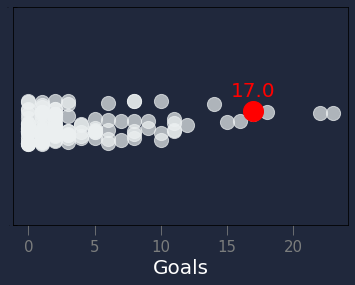

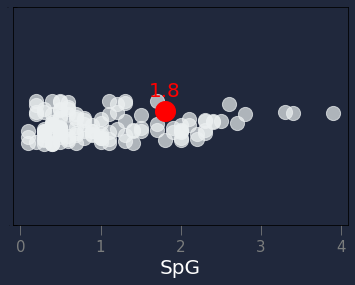

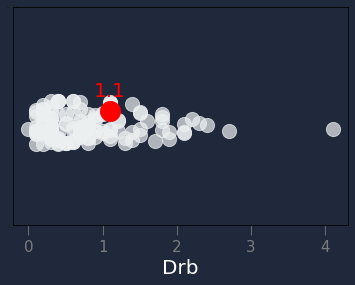

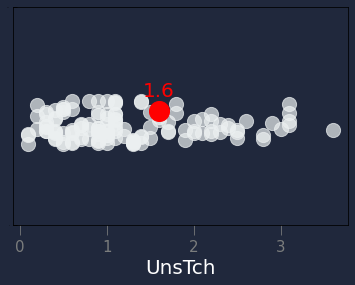

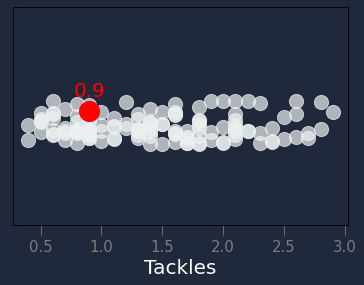

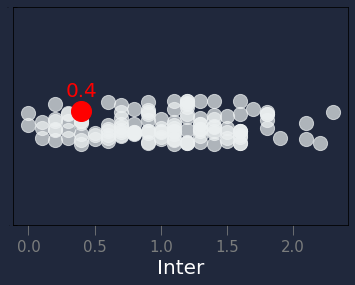

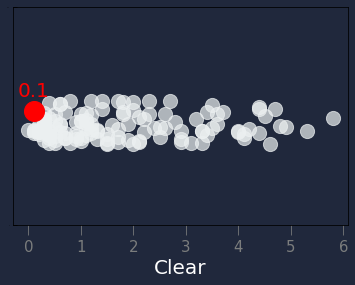

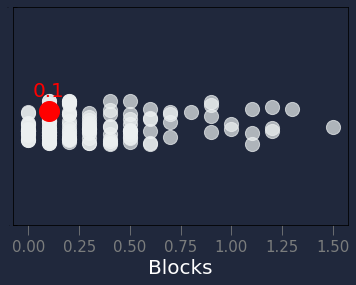

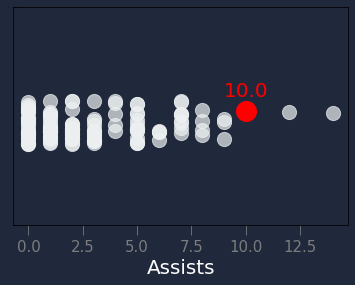

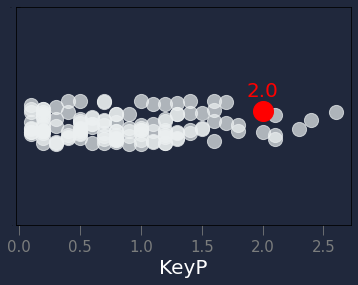

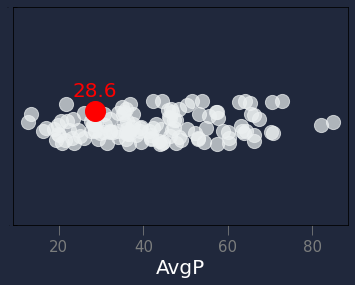

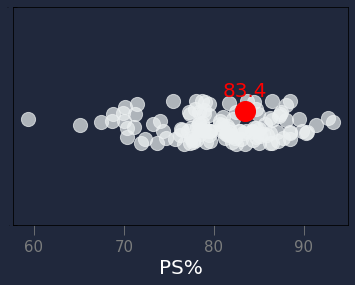

In [27]:
for i in types:
    graph(i)

### 세부 데이터 부족하여, 전에 썻던 언더 스탯 데이터를 좀 더 추가시켜보기로하였다.

In [28]:
data_2020=dataget('EPL_2020-2021_Player_data.csv')
data_2020= indexdrop(data_2020)

In [29]:
data_2020.describe()

,Apps,Min,G,A,xGChain,xGBuildup,xG90,xA90,xG90 + xA90
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,24.606667,1787.286667,3.286667,1.973333,8.104867,4.563967,0.172867,0.101667,0.274567
std,9.251157,892.271899,3.882620,2.461603,5.938098,3.553909,0.167263,0.085921,0.214411
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,1135.750000,1.000000,0.000000,3.557500,1.977500,0.050000,0.030000,0.100000
50%,26.000000,1801.000000,2.000000,1.000000,7.030000,3.645000,0.105000,0.090000,0.210000
75%,32.000000,2531.000000,4.000000,3.000000,10.700000,6.565000,0.252500,0.160000,0.410000
max,38.000000,3420.000000,23.000000,14.000000,28.970000,18.970000,0.640000,0.490000,0.940000


In [30]:
#25경기 이상 뛴 선수들로만 추려서 분석.
filt=data_2020['Apps']>25.0
df_2020=data_2020[filt]

In [31]:
df_2020

,Player,Team,Apps,Min,G,A,xGChain,xGBuildup,xG90,xA90,xG90 + xA90
0,Harry Kane,Tottenham,35.0,3097.0,23,14,25.00,4.45,0.64,0.22,0.86
1,Mohamed Salah,Liverpool,37.0,3085.0,22,5,28.97,9.80,0.59,0.19,0.78
2,Bruno Fernandes,Manchester United,37.0,3117.0,18,12,26.91,11.93,0.46,0.33,0.79
3,Son Heung-Min,Tottenham,37.0,3139.0,17,10,20.67,6.61,0.32,0.27,0.59
4,Patrick Bamford,Leeds,38.0,3085.0,17,7,23.39,4.13,0.54,0.11,0.65
...,...,...,...,...,...,...,...,...,...,...,...
284,Aaron Cresswell,West Ham,36.0,3176.0,0,8,10.62,8.39,0.03,0.21,0.23
287,David de Gea,Manchester United,26.0,2298.0,0,0,2.11,2.11,0.00,0.00,0.00
297,Alex McCarthy,Southampton,30.0,2700.0,0,0,2.76,2.76,0.00,0.00,0.00
298,Hugo Lloris,Tottenham,38.0,3420.0,0,0,4.80,4.80,0.00,0.00,0.00


In [32]:
filt2=df_2020['Player']=='Son Heung-Min'
son_data2=df_2020[filt2]

In [33]:
def graph(types):
    plt.figure(facecolor='#20283C')
    ax =plt.gca()
    ax.set_facecolor('#20283C')
    plt.scatter(df_2020[types],df_2020['Min'],s=200,alpha=0.7,c='#ECF0F1')
    plt.scatter(son_data2[types],son_data2['Min'],s=400,c='r')
    plt.text(son_data2[types],son_data2['Min']+400,float(son_data2[types]),ha='center',c='r',size=20)
    plt.tick_params(axis='y',direction='in',labelsize=0)
    plt.tick_params(axis='x',direction='out',labelsize=15,pad=5,length=10,color='#7B7D7D',labelcolor='#7B7D7D')
    plt.yticks([0,6000])
    plt.xlabel(types,color='w',size=20)
    plt.savefig(str(types)+'.Png',dpi=300,bbox_inches='tight')
    plt.show()

In [34]:
son_data2.columns

Index(['Player', 'Team', 'Apps', 'Min', 'G', 'A', 'xGChain', 'xGBuildup',
       'xG90', 'xA90', 'xG90 + xA90'],
      dtype='object')

In [35]:
types=['xGChain', 'xGBuildup','xG90', 'xA90']

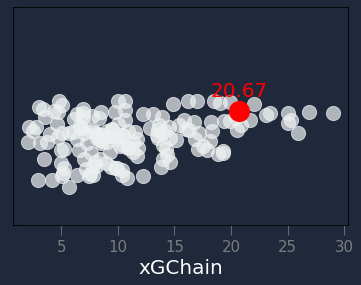

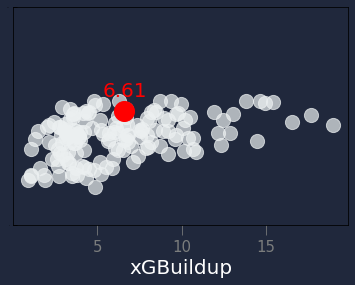

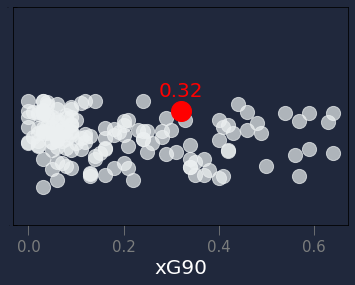

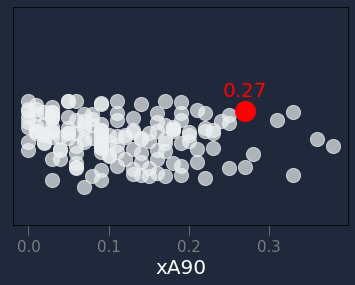

In [36]:
for i in types:
    graph(i)

### 손흥민 데이터중 몇가지 지표를 90분당으로 만들어 조금은 특이한 원형그래포 시각화 해보는 것으로  
### 이 프로젝트를  마무리하려한다.

- 그래프에 포함 될 내용(모든 기준은 경기당)    
    * xGChain90  
    * xGBuild90    
    * xG90  
    * xA90   
    * 경기당 골수  
    * 경기당 어시수

### 위에 해당되는 데이터를 한 데이터 프레임으로 만들기

In [37]:
son_data2['Min/90']=round(son_data2['Min']/90,2)
son_data2['G/90']=round(son_data2['G']/son_data2['Min/90'],2)
son_data2['A/90']=round(son_data2['A']/son_data2['Min/90'],2)
son_data2['xGChain/90']=round(son_data2['xGChain']/son_data2['Min/90'],2)
son_data2['xGBuildup/90']=round(son_data2['xGBuildup']/son_data2['Min/90'],2)
son_data_total=son_data2.drop(columns=['G','A','xGChain','xGBuildup','xG90 + xA90'])
son_data_total=son_data_total.reset_index()
son_data_total=son_data_total.drop(columns=['index','Player','Team','Apps','Min','Min/90'])

#### 최종 손흥민의 데이터

In [50]:
son_data_total

,xG90,xA90,G/90,A/90,xGChain/90,xGBuildup/90
0,0.32,0.27,0.49,0.29,0.59,0.19


### 원형 그래프 그리기

In [51]:
# 컬럼 작업.
son_data_total.columns

Index(['xG90', 'xA90', 'G/90', 'A/90', 'xGChain/90', 'xGBuildup/90'], dtype='object')

In [56]:
# 원형 그래프 그리기 위해 마지막에 처음 값을 반복)

categories=['xG90', 'xA90', 'G/90', 'A/90', 'xGChain/90', 'xGBuildup/90']
categories=[*categories,categories[0]]

values=list(son_data_total.iloc[0])
values=[*values,values[0]]

In [66]:
# 좌표

label_loc = np.linspace(start=0,stop=2*np.pi,num=len(values))

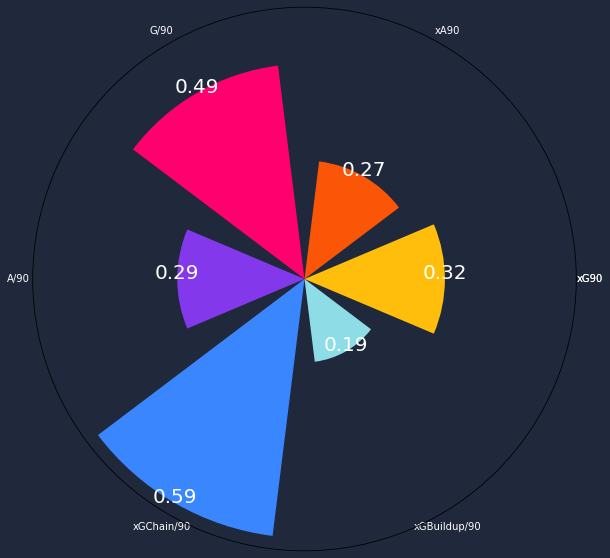

In [111]:
# 그래프
plt.figure(figsize=(10,10),facecolor='#20283C')
ax=plt.subplot(polar=True)
ax.set_facecolor('#20283C')

plt.xticks(label_loc,labels=categories,fontsize=10,color='w')

ax.bar(label_loc[0],values[0],color='#FFBE0B',label='xG90')
plt.text(label_loc[0],values[0],values[0],size=20,c='w',ha='center')
ax.bar(label_loc[1],values[1],color='#FB5607',label='xA90')
plt.text(label_loc[1],values[1],values[1],size=20,c='w',ha='center')
ax.bar(label_loc[2],values[2],color='#FF006E',label='G/90')
plt.text(label_loc[2],values[2],values[2],size=20,c='w',ha='center')
ax.bar(label_loc[3],values[3],color='#8338EC',label='A/90')
plt.text(label_loc[3],values[3],values[3],size=20,c='w',ha='center')
ax.bar(label_loc[4],values[4],color='#3A86FF',label='xGChain/90')
plt.text(label_loc[4],values[4],values[4],size=20,c='w',ha='center')
ax.bar(label_loc[5],values[5],color='#8EDCE6',label='xGBuild/90')
plt.text(label_loc[5],values[5],values[5],size=20,c='w',ha='center')
ax.set_yticklabels([])
ax.grid()
plt.savefig('sample1.png')
plt.show()

### 이제는 선수들 평균을 구해 손흥민과 비교

In [120]:
(df_2020['G']+df_2020['A']).mean()

7.547770700636943

In [121]:
filt=df_2020['G']+df_2020['A']>=7

In [124]:
df=df_2020[filt]

In [129]:
df['Min/90']=round(df['Min']/90,2)
df['G/90']=round(df['G']/df['Min/90'],2)
df['A/90']=round(df['A']/df['Min/90'],2)
df['xGChain/90']=round(df['xGChain']/df['Min/90'],2)
df['xGBuildup/90']=round(df['xGBuildup']/df['Min/90'],2)
player_data_total=df.drop(columns=['G','A','xGChain','xGBuildup','xG90 + xA90'])
player_data_total=player_data_total.reset_index()
player_data_total=player_data_total.drop(columns=['index','Player','Team','Apps','Min','Min/90'])

In [132]:
player_data_total=player_data_total.mean()

In [135]:
player_data_total=round(player_data_total,2)

In [138]:
player_data_total=list(player_data_total)

In [140]:
# 원형 그래프 그리기 위해 마지막에 처음 값을 반복)

categories=['xG90', 'xA90', 'G/90', 'A/90', 'xGChain/90', 'xGBuildup/90']
categories=[*categories,categories[0]]

values=list(son_data_total.iloc[0])
values=[*values,values[0]]

In [142]:
# 좌표

label_loc = np.linspace(start=0,stop=2*np.pi,num=len(values))

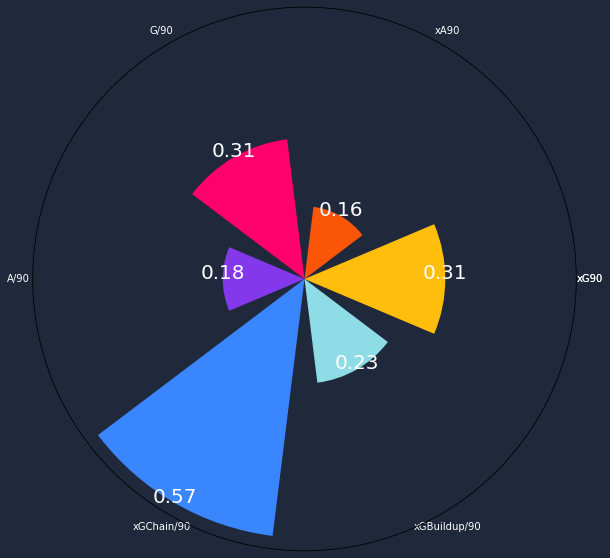

In [146]:
# 그래프
plt.figure(figsize=(10,10),facecolor='#20283C')
ax=plt.subplot(polar=True)
ax.set_facecolor('#20283C')

plt.xticks(label_loc,labels=categories,fontsize=10,color='w')

ax.bar(label_loc[0],values[0],color='#FFBE0B',label='xG90')
plt.text(label_loc[0],values[0],values[0],size=20,c='w',ha='center')
ax.bar(label_loc[1],values[1],color='#FB5607',label='xA90')
plt.text(label_loc[1],values[1],values[1],size=20,c='w',ha='center')
ax.bar(label_loc[2],values[2],color='#FF006E',label='G/90')
plt.text(label_loc[2],values[2],values[2],size=20,c='w',ha='center')
ax.bar(label_loc[3],values[3],color='#8338EC',label='A/90')
plt.text(label_loc[3],values[3],values[3],size=20,c='w',ha='center')
ax.bar(label_loc[4],values[4],color='#3A86FF',label='xGChain/90')
plt.text(label_loc[4],values[4],values[4],size=20,c='w',ha='center')
ax.bar(label_loc[5],values[5],color='#8EDCE6',label='xGBuild/90')
plt.text(label_loc[5],values[5],values[5],size=20,c='w',ha='center')
ax.set_yticklabels([])
ax.grid()
plt.savefig('sample2.png')
plt.show()

### The end!